# imports

In [2]:
from abc import ABC
# todo: insert dask datatypes all over
import logging
import pydot_ng as pydot
from IPython.display import Image, display
import sys, os
import yaml
from attrdict import AttrDict
import numpy as np
from numba import jit
from sklearn.externals import joblib
from matplotlib import pyplot as plt
import seaborn as sns
import copy
from tqdm import tqdm
import pandas as pd
from pandas.core.dtypes.generic import ABCDataFrame, ABCIndexClass, ABCSeries
from pandas.util._validators import validate_bool_kwarg
from pandas.core.dtypes.common import (is_bool,
    is_categorical_dtype, is_datetime64_dtype, is_datetimelike, is_dict_like,
    is_extension_array_dtype, is_extension_type, is_hashable, is_integer,
    is_iterator, is_list_like, is_scalar, is_string_like, is_timedelta64_dtype)

import multiprocessing as mp
#import ray
#ray.shutdown()
#ray.init()
#ray.init(num_cpus=int(mp.cpu_count()),
#        object_store_memory = int(30e09)) # theads on this machine
#                               ,  ,  , 

import timeit,random,math
#
import warnings
warnings.filterwarnings("ignore")


In [2]:
__file__ = !cd ../../;pwd
__file__ = __file__[0]
__file__
sys.path.append(__file__)
sys.path

['/Users/brucecottman/Documents/PROJECTS/paso/tests/pre',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/paso']

In [8]:
from sklearn.datasets import load_boston
import paso
from paso.base import pasoFunction, _Check_No_NA_Values,pasoError 
from paso.base import get_paso_log, toDataFrame,is_DataFrame
from paso.base import dask_pandas_ratio,_time_required
#from paso.base import dask_pandas_startup_ratio
from paso.base import pasoDecorators,pasoModel
from paso.pre.toCategory import toCategory

## Logging

In [51]:
the_paso_log.log = paso_logger()._start_paso_log('pafredso')
Log = the_paso_log.log
Log.info("it lives!!")

pafredso.2019-05-29.15:57:19.it lives!!


In [49]:
the_paso_log.log = paso_logger()._start_paso_log('bbcv')
Log = the_paso_log.log
Log.info("it lives again?")

bbcv.2019-05-29.15:55:02.it lives again?
bbcv.2019-05-29.15:55:02.it lives again?
bbcv.2019-05-29.15:55:02.it lives again?


## test df and nunmpy

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()
City = pd.DataFrame(boston.data, columns=boston.feature_names)
City.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
a = City.values
a[0,0]= .18

In [26]:
City = pd.DataFrame(data=a, copy=False)

In [27]:
City.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.18000,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
x = False
not x


True

In [14]:
def foo(*args,**kwargs):
    print('foo',kwargs)
    g(**kwargs)
    
def g(*args,a=3,**kwargs):
    print('g',a)
    print('g',kwargs)
    
foo(a=1,b=2)

foo {'a': 1, 'b': 2}
g 1
g {'b': 2}


In [7]:
def dask_pandas_startup_ratio(magnitude=1):
    """
    dask_cost calulates the ratio of dask dataframe - pandas
    dataframe in wall clock time. On a single CPU the ratio is 1.0.
    On a multiprocessor (usually 2 threads per CPU) the dask-pandas time
    cost ratio grows larger (favorable to Dask)
    the more elements per benchmark dataframe.

    Parameters:
        Nome

    Returns:
        pandas dataframe

    Example:
        >>> (On 12-CPU MacPro)
        >>> dask_pandas_ratio()
    """

    from sklearn.datasets import load_boston
    import dask.dataframe as pdd
    boston = load_boston()
    City = pd.DataFrame(boston.data, columns=boston.feature_names)

    c = []; m = []
    for power in tqdm(range(magnitude)):
        scale = 10**power
        bc = pd.concat([City for i in range(int(1.5 * scale))], axis=0)
        print(type(bc),bc.shape, bc.shape[0] * bc.shape[1])
        N = mp.cpu_count()  # theads on this machine
        bcd = pdd.from_pandas(bc, npartitions=N)

        t1 = _time_required(bc.count)
        t2 = _time_required(bcd.count)
        c.append(('count'
                  , round(math.log10(bc.shape[0] * bc.shape[1]), 0)
                  , t1, t2, (round(t1 / t2, 2))))

        t1 = _time_required(bc.sum)
        t2 = _time_required(bcd.sum)
        c.append(('sum'
                  , round(math.log10(bc.shape[0] * bc.shape[1]), 0)
                  , t1, t2, (round(t1 / t2, 2))))

        t1 = _time_required(bc.mean)
        t2 = _time_required(bcd.mean)
        c.append(('mean'
                  , round(math.log10(bc.shape[0] * bc.shape[1]), 0)
                  , t1, t2, (round(t1 / t2, 2))))

        t1 = _time_required(bc.isnull)
        t2 = _time_required(bcd.isnull)
        c.append(('isnull'
                  , round(math.log10(bc.shape[0] * bc.shape[1]), 0)
                  , t1, t2, (round(t1 / t2, 2))))

    df = pd.DataFrame(c,columns=['f()','log10(N)','t-pd(s)','t-dask(s)','t-pd/t-dask'])
    ax = sns.lineplot(x='log10(N)', y='t-pd/t-dask', hue='f()', data=df)
    ax.set_yscale('log')
    ax.set_xlabel('Number elements(log10)')
    ax.set_ylabel('Ratio dask/pandas')
    plt.plot([4, 8], [1, 1], c='black', linewidth=3)
    return df


# Ray

In [4]:
def _time_required(func):
    timerr = timeit.default_timer
    x = timerr()
    for i in range(10): func()
    y = timerr()
    return(y - x)

In [5]:
def ray_pandas_ratio(magnitude = 4):
    """
    fast_pandas_ratio calulates the ratio of fast dataframe - pandas
    dataframe in wall clock time. On a single CPU the ratio is 1.0.
    On a multiprocessor (usually 2 threads per CPU) the fast-pandas time
    cost ratio grows larger (favorable to Dask)
    the more elements per benchmark dataframe.

    Parameters:
        Nome

    Returns:
        pandas dataframe

    Example:
        >>> (On 12-CPU MacPro)
        >>> dask_pandas_ratio()
    """
    import modin.pandas as fpd
    
    boston = load_boston()
    City = pd.DataFrame(boston.data, columns=boston.feature_names)
    fast_City = fpd.DataFrame(boston.data, columns=boston.feature_names)
    c = [];
    m = []
    for power in tqdm(range(magnitude)):
        scale = 10**power
        bc = pd.concat([City for i in range(int(1.5 * scale))], axis=0)
        fbc =  fpd.concat([fast_City for i in range(int(1.5 * scale))], axis=0)
        bc.shape, bc.shape[0] * bc.shape[1]


        t1 = _time_required(bc.count)
        t2 = _time_required(fbc.count)
        c.append(('count'
                  , round(math.log10(bc.shape[0] * bc.shape[1]), 0)
                  , t1, t2, (round(t1 / t2resolve))))

        t1 = _time_required(bc.sum)
        t2 = _time_required(fbc.sum)
        c.append(('sum'
                  , round(math.log10(bc.shape[0] * bc.shape[1]), 0)
                  , t1, t2, (round(t1 / t2resolve))))

        t1 = _time_required(bc.mean)
        t2 = _time_required(fbc.mean)
        c.append(('mean'
                  , round(math.log10(bc.shape[0] * bc.shape[1]), 0)
                  , t1, t2, (round(t1 / t2resolve))))

        t1 = _time_required(bc.isnull)
        t2 = _time_required(fbc.isnull)
        c.append(('isnull'
                  , round(math.log10(bc.shape[0] * bc.shape[1]), 0)
                  , t1, t2, (round(t1 / t2resolve))))
        print('isnull'
                  , round(math.log10(bc.shape[0] * bc.shape[1]), 0)
                  , t1, t2, (round(t1 / t2resolve)))



    df = pd.DataFrame(c,columns=['f()','log10(N)','t-pd(s)','t-dask(s)','t-pd/t-dask'])
    ax = sns.lineplot(x='log10(N)', y='t-pd/t-ray', hue='f()', data=df)
    ax.set_yscale('log')
    ax.set_xlabel('Number elements(log10)')
    ax.set_ylabel('Ratio dask/pandas')
    plt.plot([4, 8], [1, 1], c='black', linewidth=3)
    return df


In [3]:
fast_pandas_ratio(6)

NameError: name 'fast_pandas_ratio' is not defined

# Dask

  0%|          | 0/5 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'> (506, 13) 6578


 20%|██        | 1/5 [00:00<00:01,  3.05it/s]

<class 'pandas.core.frame.DataFrame'> (7590, 13) 98670


 40%|████      | 2/5 [00:00<00:01,  2.99it/s]

<class 'pandas.core.frame.DataFrame'> (75900, 13) 986700


 60%|██████    | 3/5 [00:01<00:00,  2.40it/s]

<class 'pandas.core.frame.DataFrame'> (759000, 13) 9867000


 80%|████████  | 4/5 [00:05<00:01,  1.49s/it]

<class 'pandas.core.frame.DataFrame'> (7590000, 13) 98670000


100%|██████████| 5/5 [00:46<00:00, 13.44s/it]


,f(),log10(N),t-pd(s),t-dask(s),t-pd/t-dask
0,count,4.0,0.011160,0.052544,0.21
1,sum,4.0,0.003082,0.048224,0.06
2,mean,4.0,0.001456,0.155791,0.01
3,isnull,4.0,0.001803,0.049145,0.04
4,count,5.0,0.025198,0.052004,0.48
5,sum,5.0,0.008241,0.044892,0.18
6,mean,5.0,0.004197,0.152425,0.03
7,isnull,5.0,0.002551,0.048008,0.05
8,count,6.0,0.163203,0.054888,2.97
9,sum,6.0,0.069503,0.044046,1.58


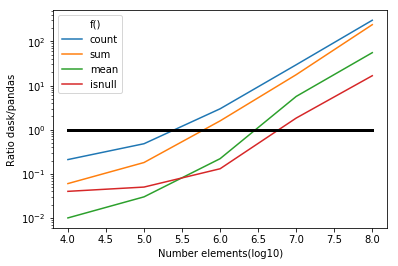

In [9]:
dask_pandas_startup_ratio(magnitude=5)

In [ ]:
dask_pandas_ratio(6)

- count is highly paralleliable and approaches thread count by machine as startup cost becomes very small relative to total compute cost;
- mean is very low end of thread using the pandas implementation'
- isnull is so fast that the benefit from multiple threads even at 1e09 elements juust about balances cost of starting thread